In [1]:
##########################################################################
# Created on Mon Jun  1 21:21:13 2020                                    #
# Knowledge Transfer for MUMSS Project [Stock]                           #
# @author: Meng Lipeng (FRM, CFA)                                        #
##########################################################################

# Stock Take ACN as an example

## 1.FSA

earnings-release-fy20-q3.pdf

In [4]:
#install package to /home/ec2-user/SageMaker/custom-miniconda/miniconda/envs/custom_python for persistence.
#import sys
#!conda install --yes --prefix {sys.prefix} -c conda-forge scipy

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.4
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/ec2-user/SageMaker/custom-miniconda/miniconda/envs/custom_python

  added / updated specs:
    - scipy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    scipy-1.5.3                |   py36h81d768a_1        19.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        19.1 MB

The following NEW packages will be INSTALLED:

  scipy              conda-forge/linux-64::scipy-1.5.3-py36h81d768a_1



scipy-1.5.3          | 19.1 MB   | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: don

## 2.Return and Volatility

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime
from matplotlib.dates import MonthLocator,DateFormatter
from scipy.stats import norm

In [3]:
ticker="ACN" 
begdate = datetime.datetime(2020,1,2)
enddate = datetime.datetime(2020,12,31)

In [4]:
df = web.get_data_yahoo(ticker,begdate,enddate)

In [5]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,211.919998,208.809998,210.860001,210.149994,2431100.0,204.304398
2020-01-03,210.630005,207.000000,208.500000,209.800003,1802100.0,203.964142
2020-01-06,208.789993,206.809998,208.270004,208.429993,2841400.0,202.632248
2020-01-07,206.259995,203.190002,203.199997,203.929993,3097400.0,198.257416
2020-01-08,205.449997,203.529999,204.000000,204.330002,2271300.0,198.646301


In [6]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-24,259.779999,256.279999,258.000000,257.299988,528100.0,254.158463
2020-12-28,260.369995,258.390015,259.730011,259.679993,1057100.0,256.509399
2020-12-29,261.029999,257.230011,260.890015,257.760010,1065200.0,254.612869
2020-12-30,259.250000,257.190002,258.670013,257.540009,992800.0,254.395538
2020-12-31,261.320007,257.480011,257.600006,261.209991,1325300.0,258.020721


In [7]:
df.columns = ['High', 'Low', 'Open', 'Close', 'Volumn', 'Adj_Close']

In [8]:
cPrice = df.Adj_Close

In [9]:
cPrice.describe()

count    253.000000
mean     209.051564
std       27.533846
min      140.233139
25%      192.358200
50%      211.182510
75%      229.896988
max      262.999207
Name: Adj_Close, dtype: float64

In [10]:
months= MonthLocator(range(1,13), bymonthday=1, interval=3)# 3rd month
monthsFmt = DateFormatter("%b '%Y")

In [11]:
dates = df.index

#### Plot Price Movement

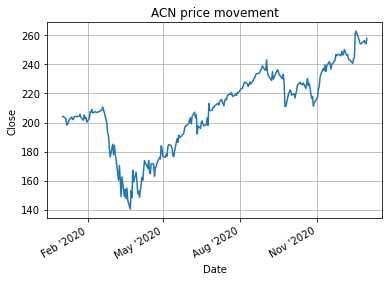

In [12]:
fig, ax = plt.subplots()
ax.plot_date(dates, cPrice.values, '-') 
ax.xaxis.set_major_locator(months) 
ax.xaxis.set_major_formatter(monthsFmt)
ax.autoscale_view()
ax.grid(True) 
fig.autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("ACN price movement")
plt.show()

#### Calculate Return

$R_{it}=\frac{P_{it}-P_{it-1}}{P_{it-1}}$

In [13]:
ret = (cPrice.values[1:] - cPrice.values[:-1]) / cPrice.values[:-1]

#### Plot Return Distribution

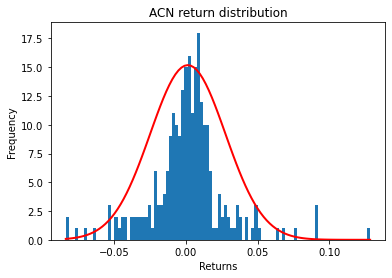

In [14]:
[n,bins,patches] = plt.hist(ret, 100)
mu = np.mean(ret) 
sigma = np.std(ret)
x = norm.pdf(bins, mu, sigma) 
plt.plot(bins, x, color='red', lw=2) 
plt.title("ACN return distribution") 
plt.xlabel("Returns") 
plt.ylabel("Frequency")
plt.show()

## 3.CAPM

Systematic Risk
    Systematic risk refers to the risk inherent to the entire market or market segment. Systematic risk, also known as “undiversifiable risk,” “volatility” or “market risk,” affects the overall market, not just a particular stock or industry. This type of risk is both unpredictable and impossible to completely avoid. It cannot be mitigated through diversification, only through hedging or by using the correct asset allocation strategy.

Nonsystematic Risk
    While systematic risk can be thought of as the probability of a loss that is associated with the entire market or a segment thereof, unsystematic risk refers to the probability of a loss within a specific industry or security.

Captal Market Pricing Model

$E(R_{i}) = R_{f}+\beta_{i}\left[E(R_{M})-R_{f}\right]$

#### Calculate Beta using linar regression

$R_{it} = \alpha_{i} + \beta_{i}R_{Mt}$

In [6]:
import pandas as pd
from scipy import stats 

In [16]:
def ret_f(ticker,begdate, enddate):
    df = web.get_data_yahoo(ticker,begdate,enddate)
    cPrice = np.array(df['Adj Close'].to_list())
    ret = (cPrice[1:] - cPrice[:-1])/cPrice[:-1]
    return ret

In [28]:
begdate = datetime.datetime(2017,1,1)
enddate = datetime.datetime(2021,9,30)

In [29]:
y0=pd.Series(ret_f('ACN',begdate,enddate))
x0=pd.Series(ret_f('^GSPC',begdate,enddate))

In [30]:
SP500Date= web.get_data_yahoo('^SP500TR',begdate,enddate).index
d=SP500Date[0:-1]

In [31]:
lag_year=d[0].strftime("%Y")

In [32]:
y1=[]
x1=[]
beta=[]

In [33]:
for i in np.arange(1,len(d)):
    year=d[i].strftime("%Y")
    if(year==lag_year):
       x1.append(x0[i])
       y1.append(y0[i])
    else:
       (beta,alpha,r_value,p_value,std_err)=stats.linregress(y1,x1) 
       alpha=round(alpha,8)
       beta=round(beta,3)
       r_value=round(r_value,3)
       p_vaue=round(p_value,3)
       print(year,alpha,beta,r_value,p_value)
       x1=[]
       y1=[]
       lag_year=year

2018 0.00039406 0.247 0.485 3.639477731684739e-16
2019 -0.00013386 0.6 0.818 1.2574292463772135e-61
2020 0.00018383 0.534 0.72 2.527552306268475e-41
2021 -8.955e-05 0.715 0.867 1.1651449756379332e-77


#### Another Way to Calculate Beta

$\beta_{i}=\frac{Cov_{i,mkt}}{\sigma_{mkt}^2}=\frac{\sigma_{i}}{\sigma_{mkt}}\times \rho_{i,mkt}$

## 4.Calculate Fair Value

#### Discount Cashflow Model(Gordon Growth Model )

$P_{0}=\frac{d_{1}}{(1+r)}+\frac{d_{2}}{(1+r)^2}+\cdots+\frac{d_{n}}{(1+r)^n}+\frac{P_{n}}{(1+r)^n}$

$P_{n}=\frac{d_{n+1}}{r-g}$

In [7]:
def pvValueNperiodModel(r, longTermGrowthRate, dividendNplus1):
    '''
    Parameters
    ----------
    r : float
        discount rate.
    longTermGrowthRate : float
        long term dividend growth rate.
    dividendNplus1 : array
        a dividend vector n + 1.

    Returns
    -------
    Stock price.

    '''
    import numpy_financial as npf
    d = dividendNplus1
    n = len(d) - 1
    g = longTermGrowthRate
    
    pv = npf.npv(r, d[:-1]) * (1 + r)
    sellingPrice = d[n] / (r - g)
    pv += npf.pv(r, n, 0, -sellingPrice)
    
    return pv

In [8]:
#Forward Annual Dividend Rate
aDR = 3.2
# Growth Rate
g = 0.0879
# Required ROE
r = 0.1042
d = [aDR, aDR * (1 + g), aDR * (1 + g)**2, aDR * (1 + g)**3, aDR * (1 + g)**4]
fair_value_acn = pvValueNperiodModel(r, g, d) 

In [36]:
fair_value_acn

198.80494811509996

## 5.Portfilio Construction

#### Get Data from Yahoo finance

In [38]:
ticker = ["ACN", "AAPL", "WMT", "GS", "XOM"]
begdate = datetime.datetime(2017,1,1)
enddate = datetime.datetime(2021,9,30)

for i in range(len(ticker)):
    df = web.get_data_yahoo(ticker[i],begdate,enddate)
    df.columns = [ticker[i] + '_High', ticker[i] + '_Low', ticker[i] + '_Open', ticker[i] + '_Close', ticker[i] + '_Volumn', ticker[i]]
    if i == 0:
        result = df[ticker[i]]
    else:
        result = pd.concat([result, df[ticker[i]]], axis=1, join='inner')
        
result.head()

,ACN,AAPL,WMT,GS,XOM
Date,,,,,
2017-01-03,107.657784,27.372362,62.291298,222.430710,70.933418
2017-01-04,107.916626,27.341719,62.654175,223.867096,70.152954
2017-01-05,106.298897,27.480766,62.790257,222.200500,69.107201
2017-01-06,107.509888,27.787132,61.928394,225.496857,69.068176
2017-01-09,106.308144,28.041645,62.336643,223.646164,67.928741


<AxesSubplot:xlabel='Date'>

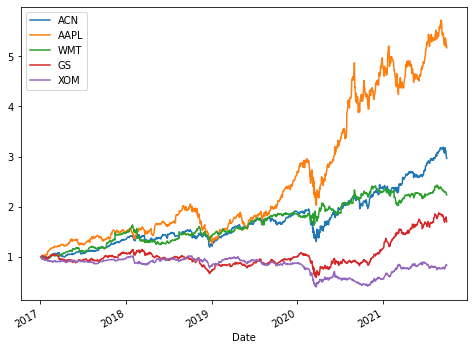

In [39]:
# Set the stock price of first day to 1 and plot
(result / result.iloc[0]).plot(figsize = (8, 6))

#### Calculate daily return

$R_{it}=\ln\frac{P_{it}}{P_{it-1}}$

In [40]:
R = np.log(result / result.shift(1))
R = R.dropna() # drop the NA from result
R.describe()

,ACN,AAPL,WMT,GS,XOM
count,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000
mean,0.000910,0.001376,0.000675,0.000444,-0.000157
std,0.015730,0.019396,0.013807,0.020088,0.019322
min,-0.087629,-0.137708,-0.107399,-0.135881,-0.130391
25%,-0.005224,-0.006542,-0.005327,-0.008460,-0.008642
50%,0.001705,0.001216,0.000617,0.000262,-0.000245
75%,0.008037,0.010835,0.006567,0.010246,0.007957
max,0.120954,0.113157,0.110723,0.161951,0.119442


array([[<AxesSubplot:title={'center':'ACN'}>,
        <AxesSubplot:title={'center':'AAPL'}>],
       [<AxesSubplot:title={'center':'WMT'}>,
        <AxesSubplot:title={'center':'GS'}>],
       [<AxesSubplot:title={'center':'XOM'}>, <AxesSubplot:>]],
      dtype=object)

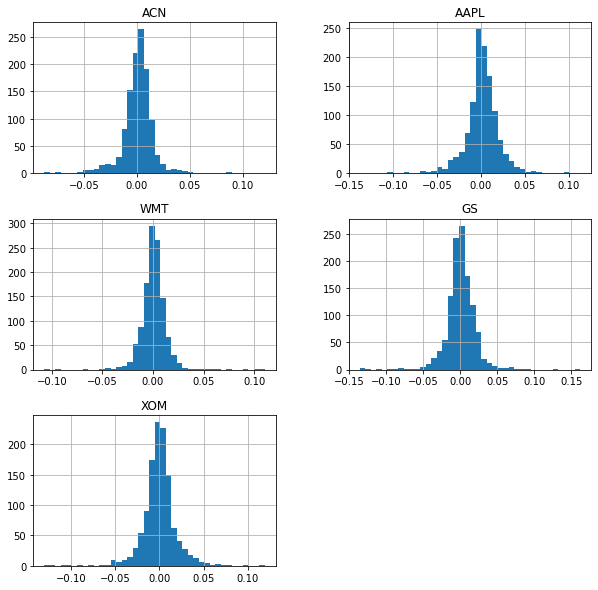

In [41]:
R.hist(bins = 40, figsize = (10, 10))

In [42]:
#Calculate annual mean
R_mean = R.mean() * 252
print(R_mean)

ACN     0.229237
AAPL    0.346714
WMT     0.169980
GS      0.111935
XOM    -0.039522
dtype: float64


In [43]:
#Calculate annual covariance assume daily returns are independent from each other
R_cov = R.cov() * 252
print(R_cov)

           ACN      AAPL       WMT        GS       XOM
ACN   0.062353  0.045777  0.021208  0.047431  0.038630
AAPL  0.045777  0.094808  0.025095  0.050100  0.034960
WMT   0.021208  0.025095  0.048038  0.020419  0.015418
GS    0.047431  0.050100  0.020419  0.101690  0.061963
XOM   0.038630  0.034960  0.015418  0.061963  0.094084


In [44]:
#Calculate correlation matrix
#Low correlation indicates high diversification
R_corr = R.corr()
print(R_corr)

           ACN      AAPL       WMT        GS       XOM
ACN   1.000000  0.595386  0.387502  0.595657  0.504359
AAPL  0.595386  1.000000  0.371859  0.510241  0.370166
WMT   0.387502  0.371859  1.000000  0.292152  0.229333
GS    0.595657  0.510241  0.292152  1.000000  0.633486
XOM   0.504359  0.370166  0.229333  0.633486  1.000000


In [45]:
#Calculate annual volatility
R_vol = R.std() * np.sqrt(252)
print(R_vol)

ACN     0.249705
AAPL    0.307909
WMT     0.219176
GS      0.318889
XOM     0.306732
dtype: float64


In [46]:
#Random weight
x = np.random.random(5) # draw five random numbers between 0~1 from uniform distribution
weights = x / np.sum(x)
print(weights)

[0.08497959 0.21975066 0.24550126 0.08374758 0.3660209 ]


In [47]:
#Calculate expected return of portfolio
R_port = np.sum(weights * R_mean)
print('Expected return of portfolio: ', round(R_port, 4))

Expected return of portfolio:  0.1323


#### Calculate volatility of portfolio

$\omega=\left[\omega_{1},\omega_{2},\cdot\cdot\cdot,\omega_{N}\right]$

$\varSigma=\begin{bmatrix}\sigma_{1}^{2} & \sigma_{12}& \cdots&\sigma_{1N}\\\sigma_{21} & \sigma_{2}^{2}&\cdots&\sigma_{2N}\\\vdots&\vdots&\ddots&\vdots\\\sigma_{N1}&\sigma_{N2}&\cdots&\sigma_{N}^{2} \end{bmatrix}$

$\sigma_{ij}=Cov(R_{i},R_{j})$

$\sigma_{P}=\sqrt{\omega\varSigma\omega^{T}}$

In [48]:
Vol_port = np.sqrt(np.dot(weights, np.dot(R_cov, weights.T)))
print('Volatility of portfolio: ', round(Vol_port, 4))

Volatility of portfolio:  0.2109


#### Plot feasible set

In [49]:
Rp_list = []
Vp_list = []
for i in np.arange(1000):
    x = np.random.random(5)
    weights = x / np.sum(x)
    Rp_list.append(np.sum(weights * R_mean))
    Vp_list.append(np.sqrt(np.dot(weights, np.dot(R_cov, weights.T))))

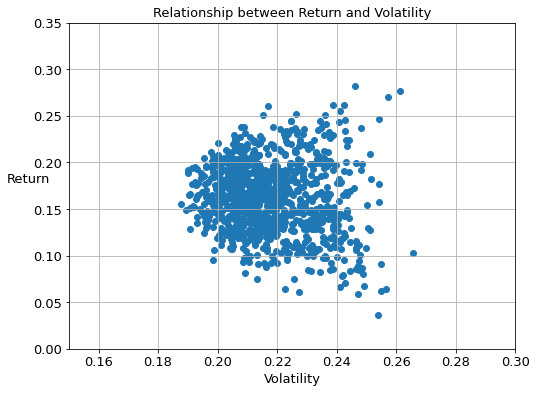

In [53]:
plt.figure(figsize = (8, 6))
plt.scatter(Vp_list, Rp_list)
plt.xlabel('Volatility', fontsize = 13)
plt.ylabel('Return', fontsize = 13, rotation = 0)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlim(0.15, 0.30)
plt.ylim(0, 0.35)
plt.title('Relationship between Return and Volatility', fontsize = 13)
plt.grid('True')
plt.show()

#### Construct efficient frontier

Optimization Function

$\mathop{min}\limits_{\omega_{i}}\sigma_{P}=\mathop{min}\limits_{\omega_{i}}\sqrt{\sum_{i=1}^N\sum_{j=1}^N\omega_{i}\omega_{j}Cov(R_{i},R_{j})}$

Constraint Condition

$\sum_{i=1}^N \omega_{i}=1$

$\omega_{i}>0$

$E(R_{p})=E(\sum_{i=1}^N\omega_{i}R_{i})=Constant$

In [9]:
import scipy.optimize as sco

In [55]:
def f(w): #define optimize function
    w = np.array(w)
    Rp_opt = np.sum(w * R_mean)
    Vp_opt = np.sqrt(np.dot(w, np.dot(R_cov, w.T)))
    return np.array([Rp_opt, Vp_opt])

In [56]:
def Vmin_f(w): #define min volatility function
    return f(w)[1]

In [57]:
cons = ({'type':'eq','fun':lambda x: np.sum(x) - 1}, {'type':'eq','fun':lambda x: f(x)[0] - 0.1})
bnds = tuple((0,1) for x in range(len(R_mean)))

In [58]:
len(R_mean) * [1.0 / len(R_mean),] #equal weight array

[0.2, 0.2, 0.2, 0.2, 0.2]

In [59]:
result = sco.minimize(Vmin_f, len(R_mean) * [1.0 / len(R_mean),], method = 'SLSQP', bounds = bnds, constraints = cons)
print('Weight of ACN when R = 10% is: ', round(result['x'][0], 4))
print('Weight of APPL when R = 10% is: ', round(result['x'][1], 4))
print('Weight of WMT when R = 10% is: ', round(result['x'][2], 4))
print('Weight of GS when R = 10% is: ', round(result['x'][3], 4))
print('Weight of XOM when R = 10% is: ', round(result['x'][4], 4))

Weight of ACN when R = 10% is:  0.0839
Weight of APPL when R = 10% is:  0.0
Weight of WMT when R = 10% is:  0.5583
Weight of GS when R = 10% is:  0.0
Weight of XOM when R = 10% is:  0.3578


In [60]:
#Calculate weight when min volatility
cons_vmin = ({'type':'eq','fun':lambda x: np.sum(x) - 1}) #Only sum of weight = 1

In [61]:
result_vmin = sco.minimize(Vmin_f, len(R_mean) * [1.0 / len(R_mean),], method = 'SLSQP', bounds = bnds, constraints = cons_vmin)
Rp_vmin = np.sum(R_mean * result_vmin['x'])
Vp_vmin = result_vmin['fun']
print('Portfolio Return when min volatility: ', round(Rp_vmin, 4))
print('Min volatility: ', round(Vp_vmin, 4))

Portfolio Return when min volatility:  0.1575
Min volatility:  0.1873


In [62]:
Rp_target = np.linspace(Rp_vmin, 0.4, 100) # target return array linspace(start, end, nums)
Vp_target = []
for r in Rp_target:
    cons_new = ({'type':'eq','fun':lambda x: np.sum(x) - 1}, {'type':'eq','fun':lambda x: f(x)[0] - r})
    result_new = sco.minimize(Vmin_f, len(R_mean) * [1.0 / len(R_mean),], method = 'SLSQP', bounds = bnds, constraints = cons_new)
    Vp_target.append(result_new['fun'])

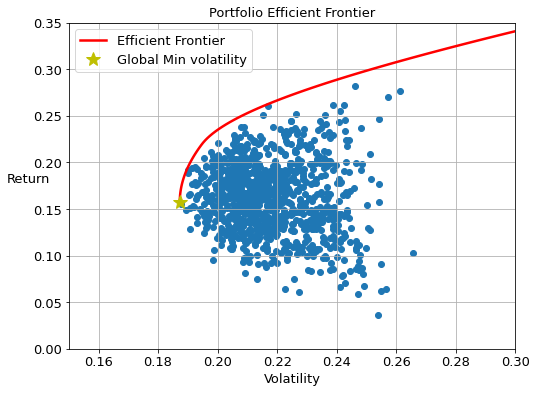

In [64]:
plt.figure(figsize = (8, 6))
plt.scatter(Vp_list, Rp_list)
plt.plot(Vp_target, Rp_target, 'r-', label = 'Efficient Frontier', lw = 2.5)
plt.plot(Vp_vmin, Rp_vmin, 'y*', label = 'Global Min volatility', markersize = 14)
plt.xlabel('Volatility', fontsize = 13)
plt.ylabel('Return', fontsize = 13, rotation = 0)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlim(0.15, 0.3)
plt.ylim(0, 0.35)
plt.title('Portfolio Efficient Frontier', fontsize = 13)
plt.legend(fontsize = 13)
plt.grid('True')
plt.show()

#### Capital Market Line

$E(R_{P})=R_{f}+\left[\frac{E(R_{M})-R_{f}}{\sigma_{M}}\right]\sigma_{P}$

Since risk free rate is always known, the optimization function is max Sharp Ratio which is showed below.

$\mathop{max}\limits_{\omega_{i}}\frac{E(R_{P})-R_{f}}{\sigma_{P}}$

Constraint Condition

$\sum_{i=1}^N \omega_{i}=1$

$\omega_{i}>0$

In [65]:
def F(w): #define a new optimize function
    Rf = 0.02 #Risk free rate
    w = np.array(w)
    Rp_opt = np.sum(w * R_mean)
    Vp_opt = np.sqrt(np.dot(w, np.dot(R_cov, w.T)))
    SR = (Rp_opt - Rf) / Vp_opt # Sharp Ratio
    return np.array([Rp_opt, Vp_opt, SR])

In [66]:
def SRmin_F(w): # define a function which is min(-SR), hence max(SR)
    return -F(w)[2]

In [67]:
cons_SR = ({'type':'eq','fun':lambda x: np.sum(x) - 1})
result_SR = sco.minimize(SRmin_F, len(R_mean) * [1.0 / len(R_mean),], method = 'SLSQP', bounds = bnds, constraints = cons_SR)

In [68]:
Rf = 0.02
slope = -result_SR['fun'] #slope of CML
Rm = np.sum(R_mean * result_SR['x']) #Expected return of market portfolio
Vm = (Rm - Rf) / slope #Volatility of market portfolio
print('Expected return of market portfolio: ', round(Rm, 4))
print('Volatility of market portfolio: ', round(Vm, 4))

Expected return of market portfolio:  0.276
Volatility of market portfolio:  0.2281


In [69]:
Rp_cml = np.linspace(0.02, 0.4)
Vp_cml = (Rp_cml - Rf) / slope

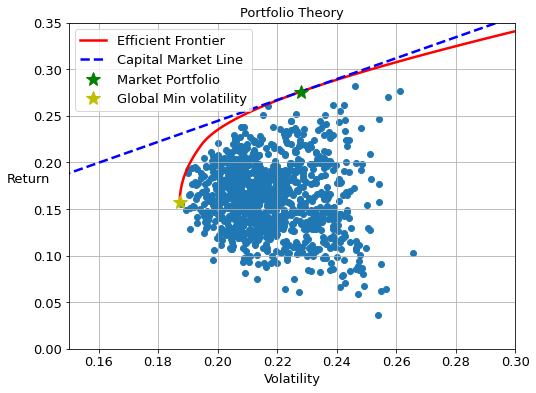

In [71]:
plt.figure(figsize = (8, 6))
plt.scatter(Vp_list, Rp_list)
plt.plot(Vp_target, Rp_target, 'r-', label = 'Efficient Frontier', lw = 2.5)
plt.plot(Vp_cml, Rp_cml, 'b--', label = 'Capital Market Line', lw = 2.5)
plt.plot(Vm, Rm, 'g*', label = 'Market Portfolio', markersize = 14)
plt.plot(Vp_vmin, Rp_vmin, 'y*', label = 'Global Min volatility', markersize = 14)
plt.xlabel('Volatility', fontsize = 13)
plt.ylabel('Return', fontsize = 13, rotation = 0)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlim(0.15, 0.3)
plt.ylim(0, 0.35)
plt.title('Portfolio Theory', fontsize = 13)
plt.legend(fontsize = 13)
plt.grid('True')
plt.show()